# Agenda

1. Background on polotting in Python/Pandas
2. Plotting with a series
    - line plot
    - bar plot
    - histogram
    - pie plot
    - boxplot
3. Plotting with a data frame
    - line
    - bar
    - histogram
    - pie plot
    - boxplot
4. Scatterplot
5. Tricks with plots
6. Seaborn

# Background on plotting

Matplotlib is powerful but hard. We can use Pandas to plot with it.

In [2]:
import pandas as pd
from pandas import Series, DataFrame

In [3]:
s = Series([10, 20, 30, 40, 50, 30, 20, 50, 60])
s

0    10
1    20
2    30
3    40
4    50
5    30
6    20
7    50
8    60
dtype: int64

<Axes: >

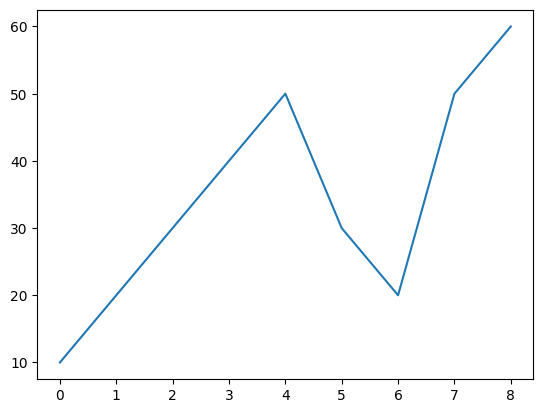

In [4]:
s.plot()

In [5]:
s = Series([10, 20, 30, 40, 50, 30, 20, 50, 60],
           index=list('abcdefghi'))
s

a    10
b    20
c    30
d    40
e    50
f    30
g    20
h    50
i    60
dtype: int64

<Axes: >

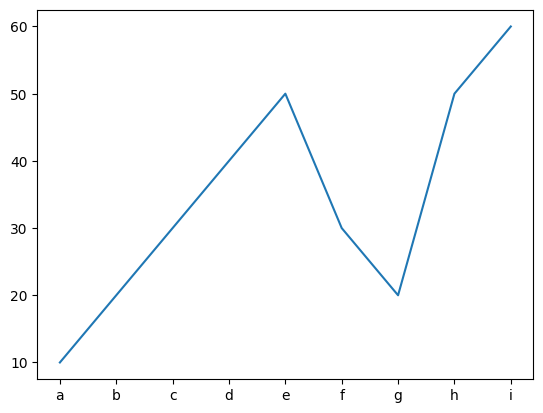

In [6]:
s.plot()

<Axes: >

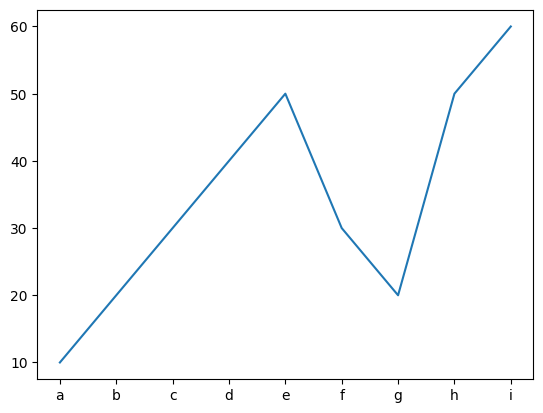

In [7]:
# the default is a line plot!
# two better ways to do this

s.plot(kind='line')

<Axes: >

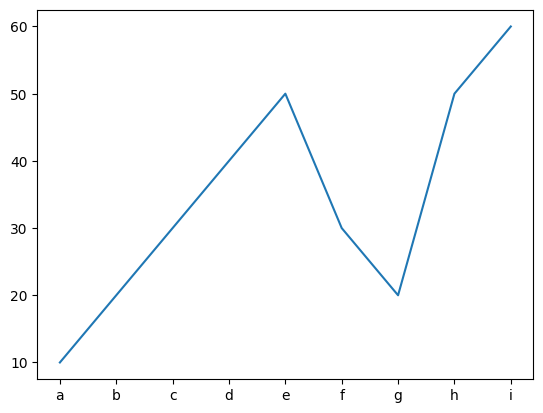

In [8]:
# we can also use plot as a name, and invoke a method on it
s.plot.line()

In [9]:
type(s.plot)

pandas.plotting._core.PlotAccessor

<Axes: >

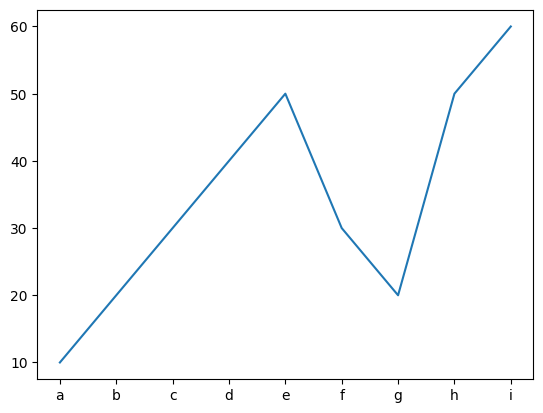

In [10]:
s.plot.__call__()

matplotlib.axes._axes.Axes

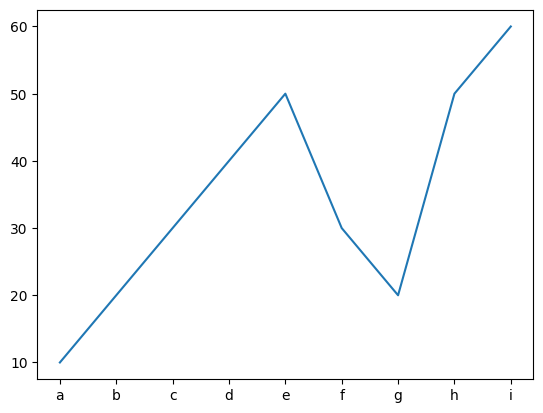

In [11]:
type(s.plot())

In [12]:
help(s.plot.line)

Help on method line in module pandas.plotting._core:

line(x: 'Hashable | None' = None, y: 'Hashable | None' = None, **kwargs) -> 'PlotAccessor' method of pandas.plotting._core.PlotAccessor instance
    Plot Series or DataFrame as lines.

    This function is useful to plot lines using DataFrame's values
    as coordinates.

            Parameters
            ----------
            x : label or position, optional
                Allows plotting of one column versus another. If not specified,
                the index of the DataFrame is used.
            y : label or position, optional
                Allows plotting of one column versus another. If not specified,
                all numerical columns are used.
            color : str, array-like, or dict, optional
                The color for each of the DataFrame's columns. Possible values are:

                - A single color string referred to by name, RGB or RGBA code,
                    for instance 'red' or '#a98d19'.

      

In [13]:
help(DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data: 'Series | DataFrame') -> 'None'
 |
 |  Make plots of Series or DataFrame.
 |
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' :

<Axes: title={'center': 'My great plot'}>

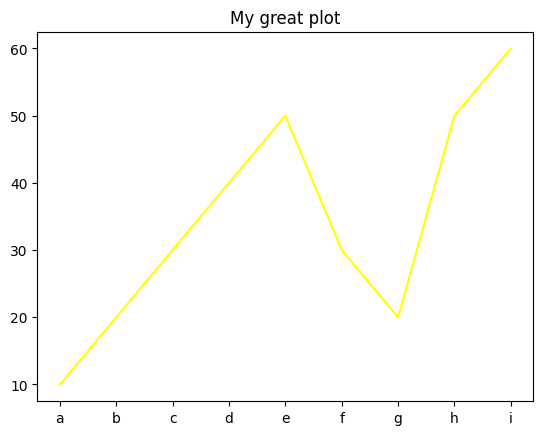

In [16]:
s.plot.line(title='My great plot',
           color='yellow')

<Axes: title={'center': 'My great plot'}>

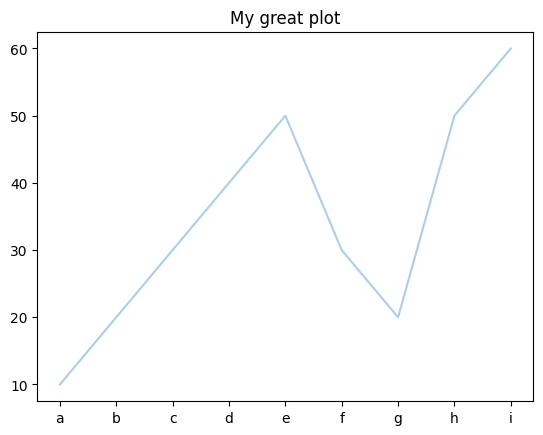

In [17]:
s.plot.line(title='My great plot',
           color='#abcdef')

<Axes: title={'center': 'My great plot'}>

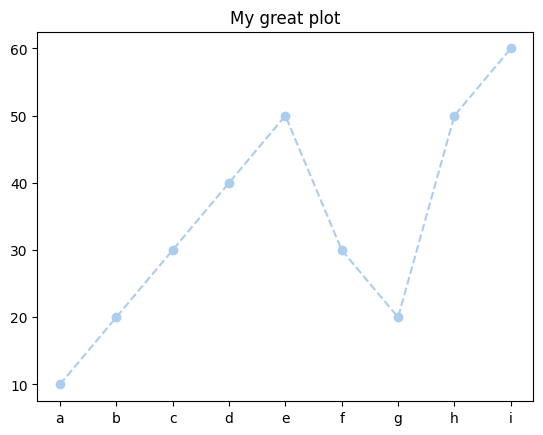

In [23]:
s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--')

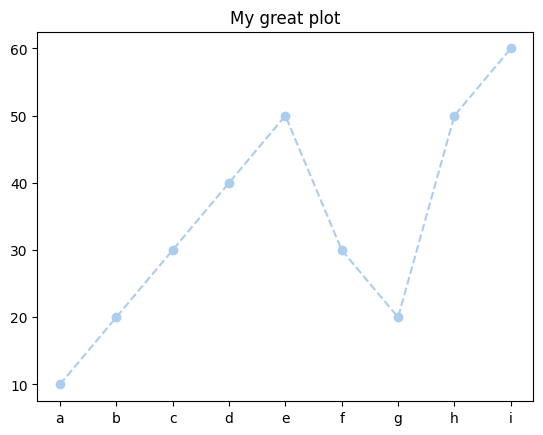

In [24]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--')

In [25]:
fig = axes.get_figure()


In [26]:
fig.savefig('myfig.png')

In [27]:
fig.savefig('myfig.jpg')

In [28]:
fig.savefig('myfig.pdf')

In [29]:
!ls

2025-05May-29-visualization.ipynb  myfig.pdf  README.md
myfig.jpg			   myfig.png  README.md~


In [30]:
!open myfig.png

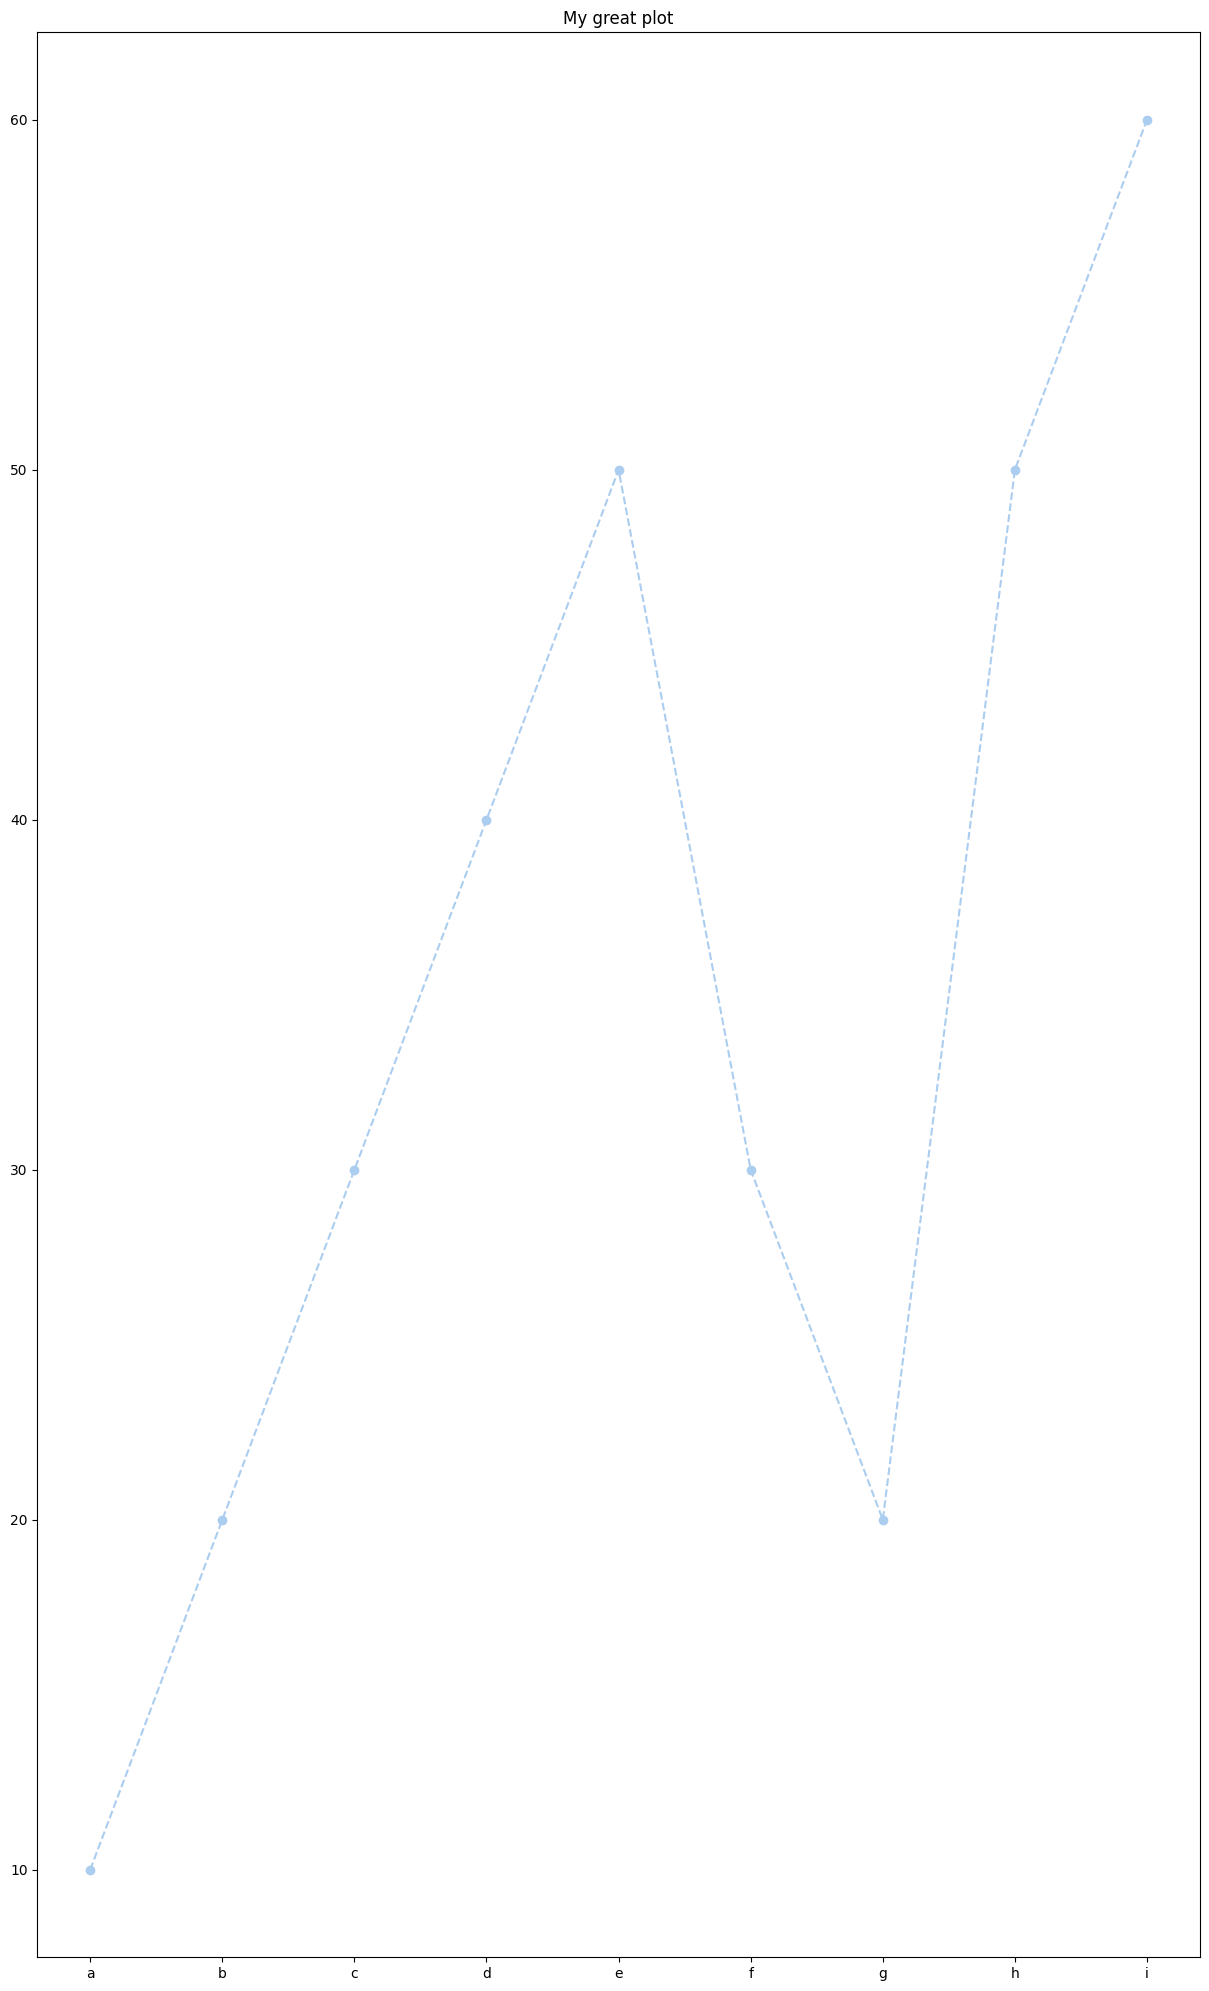

In [32]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--',
                  figsize=(15, 25))

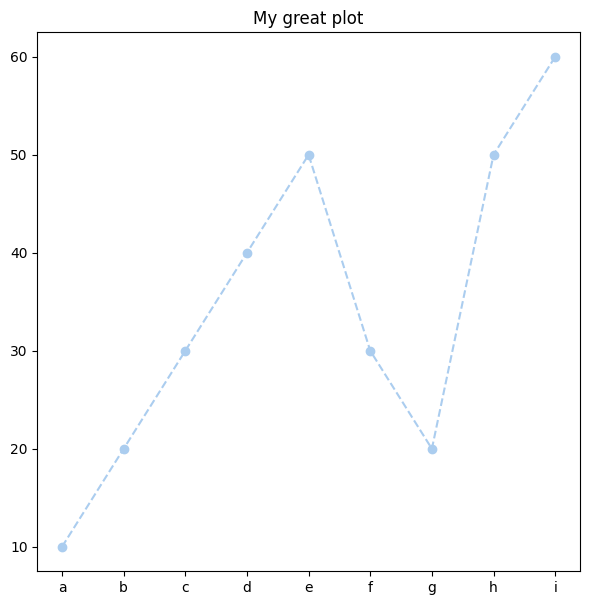

In [33]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--',
           figsize=(7, 7))

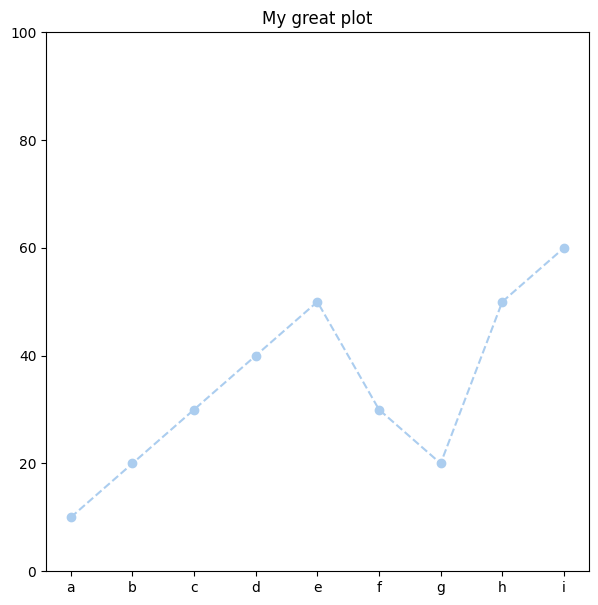

In [35]:
axes = s.plot.line(title='My great plot',
           color='#abcdef',
           style='o--',
           figsize=(7, 7),
                  ylim=(0, 100))

# Exercise: Temperature plot

1. Define a series with 10 elements, the max/high temp predicted for the next 10 days.
2. Plot with a line plot, from -10 to 40 on the y axis.

In [36]:
high_temps = Series([28, 33, 28, 26, 26, 28, 31, 32, 32, 32],
                   index='0530 0531 0601 0602 0603 0604 0605 0606 0607 0608'.split())
high_temps

0530    28
0531    33
0601    28
0602    26
0603    26
0604    28
0605    31
0606    32
0607    32
0608    32
dtype: int64

<Axes: title={'center': 'High temps'}>

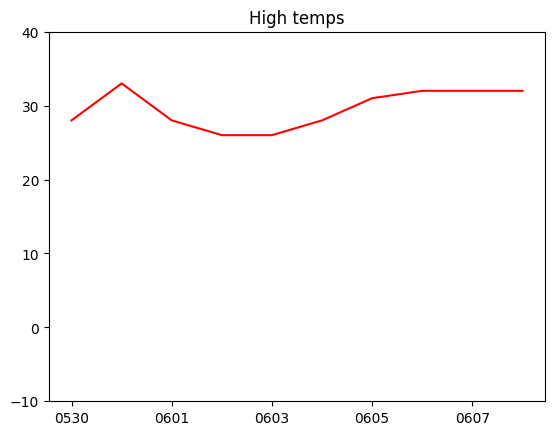

In [39]:
high_temps.plot.line(title='High temps',
                    ylim=(-10, 40), color='red')

In [41]:
low_temps = Series([18, 18, 17, 17, 16, 17, 18, 19, 19, 19],
                   index='0530 0531 0601 0602 0603 0604 0605 0606 0607 0608'.split())
low_temps

0530    18
0531    18
0601    17
0602    17
0603    16
0604    17
0605    18
0606    19
0607    19
0608    19
dtype: int64

<Axes: >

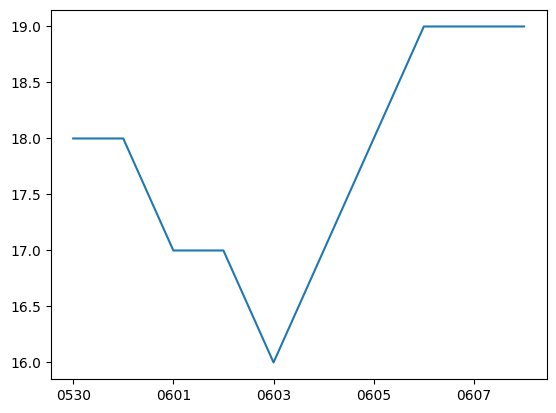

In [42]:
low_temps.plot.line()

<Axes: title={'center': 'High temps'}>

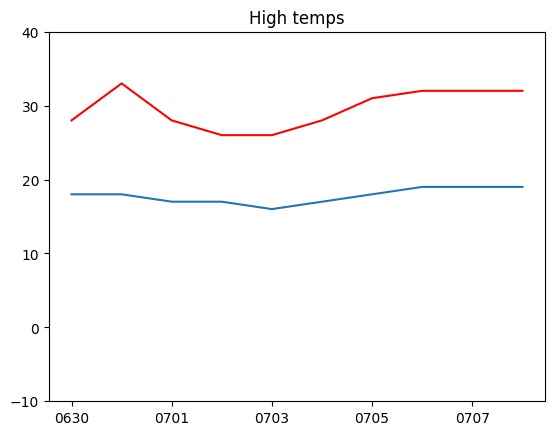

In [44]:
low_temps = Series([18, 18, 17, 17, 16, 17, 18, 19, 19, 19],
                   index='0630 0631 0701 0702 0703 0704 0705 0706 0707 0708'.split())
low_temps
ax = high_temps.plot.line(title='High temps',
                    ylim=(-10, 40), color='red')
low_temps.plot.line(ax=ax)

<Axes: >

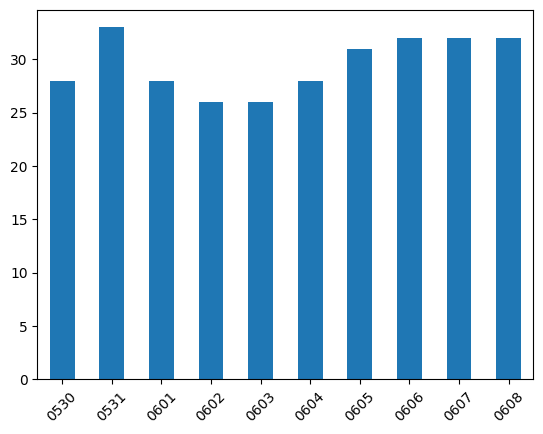

In [52]:
# bar plot

high_temps.plot.bar(rot=45)

<Axes: >

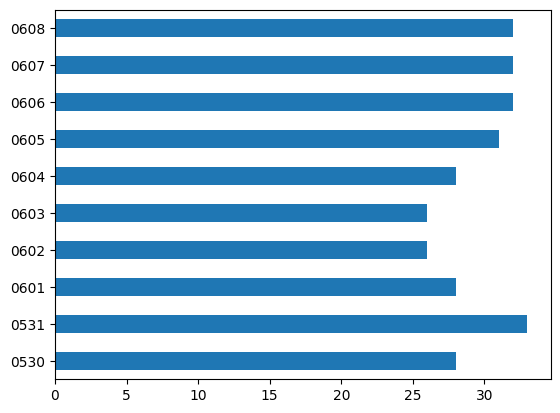

In [53]:
# bar plot (horizontal)

high_temps.plot.barh()

# Exercise: New York temps

1. Open `new+york,ny.csv` (on this GitHub repo) into a data frame
2. Set `date_time` to be the index as `datetime` values
3. use a line plot, then a bar plot, to show the max temp in NY.

In [66]:
s = pd.read_csv('new+york,ny.csv',
                usecols=[0, 1],
                 names=['datetime', 'maxtemp'],
                parse_dates=['datetime'],
                header=0,
                index_col='datetime')['maxtemp']
s

datetime
2018-12-11 00:00:00    4
2018-12-11 03:00:00    4
2018-12-11 06:00:00    4
2018-12-11 09:00:00    4
2018-12-11 12:00:00    4
                      ..
2019-03-11 09:00:00    6
2019-03-11 12:00:00    6
2019-03-11 15:00:00    6
2019-03-11 18:00:00    6
2019-03-11 21:00:00    6
Name: maxtemp, Length: 728, dtype: int64

In [67]:
s.dtype

dtype('int64')

<Axes: xlabel='datetime'>

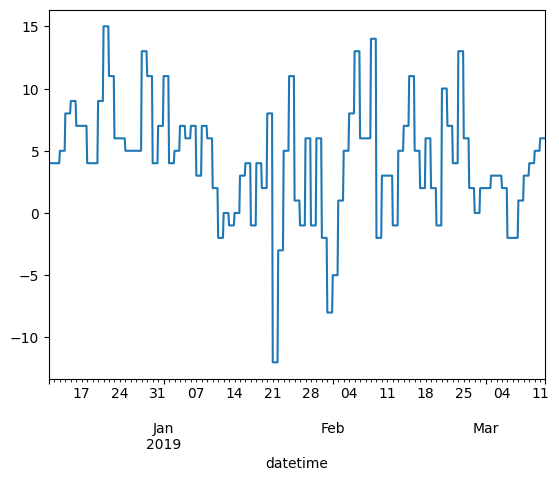

In [68]:
s.plot.line()

<Axes: xlabel='datetime'>

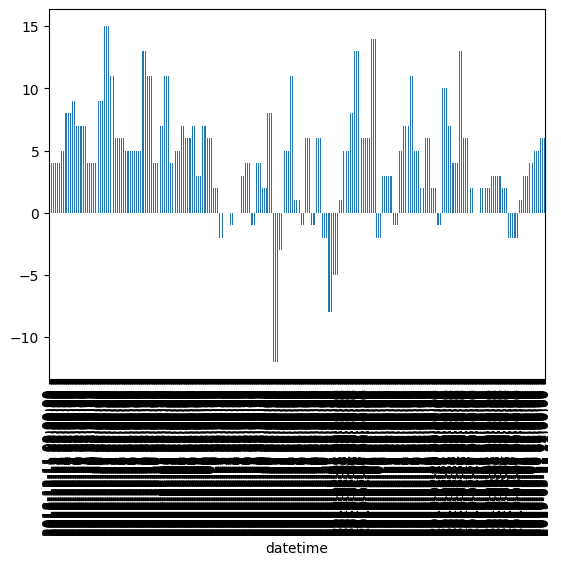

In [69]:
s.plot.bar()

<Axes: ylabel='Frequency'>

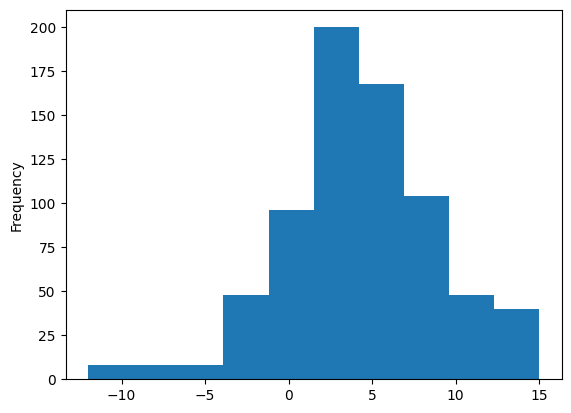

In [70]:
# histogram 

s.plot.hist()

<Axes: ylabel='Frequency'>

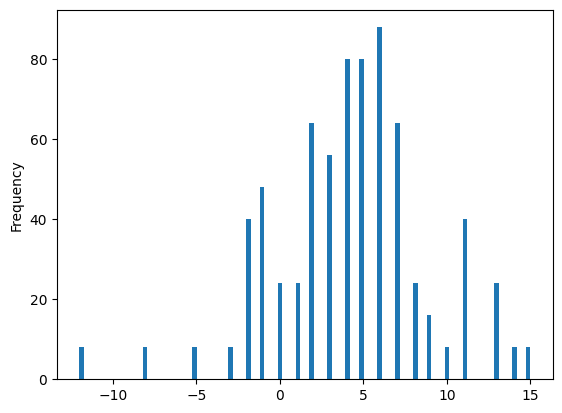

In [72]:
s.plot.hist(bins=100)

In [73]:
s.iloc[-1] = 100

<Axes: ylabel='Frequency'>

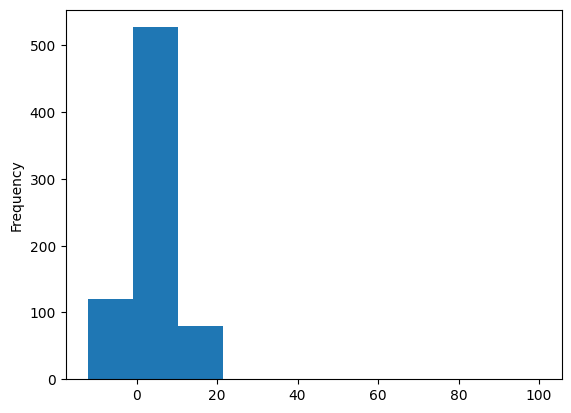

In [74]:
s.plot.hist()

<Axes: ylabel='Frequency'>

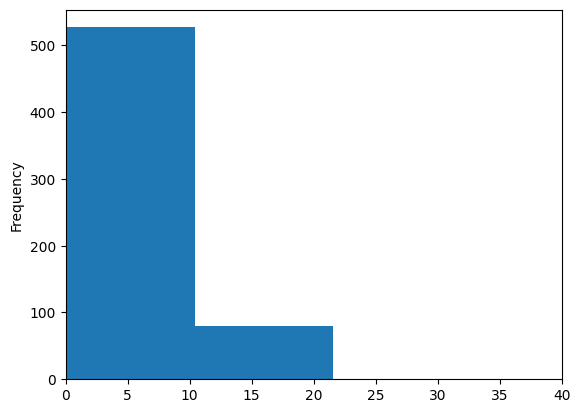

In [76]:
s.plot.hist(xlim=(0, 40))

<Axes: ylabel='Frequency'>

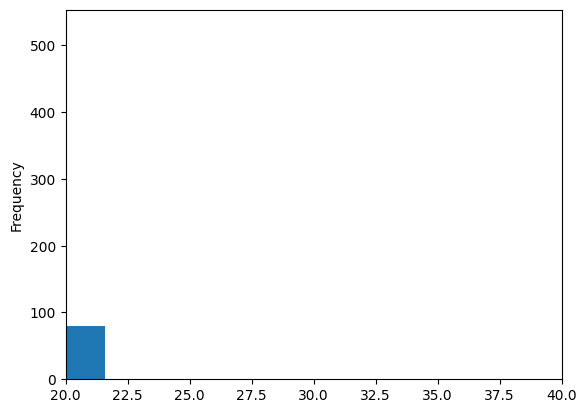

In [77]:
s.plot.hist(xlim=(20, 40))

In [78]:
high_temps

0530    28
0531    33
0601    28
0602    26
0603    26
0604    28
0605    31
0606    32
0607    32
0608    32
dtype: int64

In [79]:
high_temps.value_counts()

28    3
32    3
26    2
33    1
31    1
Name: count, dtype: int64

In [80]:
high_temps.value_counts(normalize=True)

28    0.3
32    0.3
26    0.2
33    0.1
31    0.1
Name: proportion, dtype: float64

<Axes: >

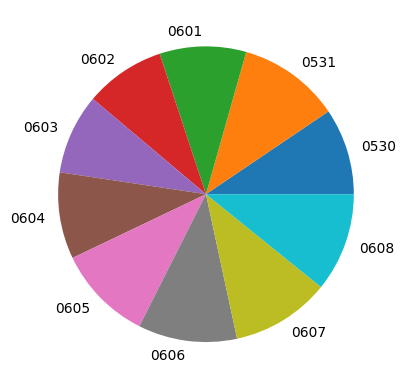

In [81]:
# pie plot

high_temps.plot.pie()  # bad idea!

<Axes: ylabel='count'>

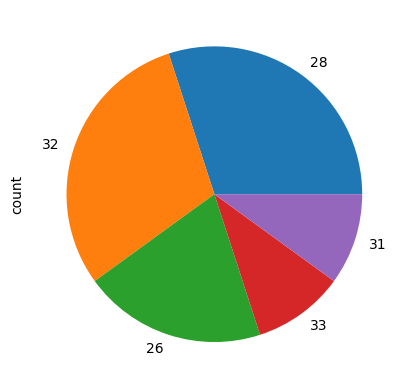

In [82]:
high_temps.value_counts().plot.pie()

In [84]:
# John Tukey

high_temps.describe()

count    10.000000
mean     29.600000
std       2.674987
min      26.000000
25%      28.000000
50%      29.500000
75%      32.000000
max      33.000000
dtype: float64

<Axes: >

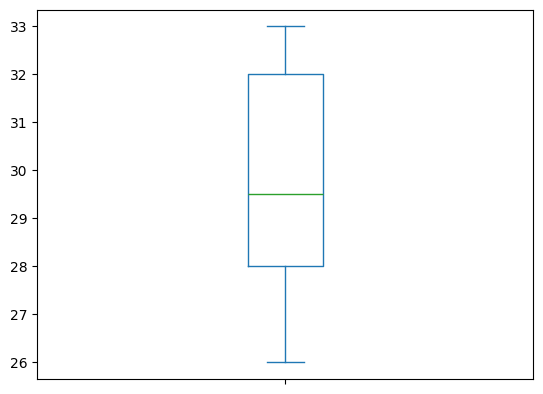

In [85]:
# boxplot
# box and whiskers plot

high_temps.plot.box()